In [149]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [150]:
warnings.filterwarnings('ignore')
file_name = "covid_19_clean_complete.csv"
file_path = os.path.join('dataset', file_name)
df = pd.read_csv(file_path, low_memory=False)

In [151]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [153]:
df["Date"] = pd.to_datetime(df["Date"],errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['Day_Number'] = (df['Date'] - df['Date'].min()).dt.days + 1

In [154]:
cn_data = df[df["Country/Region"] =='China'].copy()
print(f" cn veri satır sayısı: {len(cn_data)}")

 cn veri satır sayısı: 6204


In [155]:
df_global = df.groupby('Date')['Confirmed'].sum().reset_index()
df_global['Day_Number'] = (df_global['Date'] - df_global['Date'].min()).dt.days + 1
X = df_global[['Day_Number']] # Bağımsız Değişken (Gün Numarası)
y = df_global['Confirmed']    # Bağımlı Değişken (Toplam Vaka Sayısı)

In [156]:
X_train, X_test, y_train, y_test =train_test_split(X , y, test_size = 0.2, random_state=42)

In [157]:
poly =PolynomialFeatures(degree=2 ,include_bias=True)

In [158]:
X_train_poly =poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [159]:
model =LinearRegression()
model.fit(X_train_poly ,y_train)

LinearRegression()

In [160]:
#tahmin
y_pred_test = model.predict(X_test_poly)
y_pred_test

array([ 1.49395663e+07,  1.11271710e+07, -2.71173476e+04,  1.86852404e+04,
        8.32056712e+05,  3.87861611e+06,  7.16088219e+04,  1.31914273e+06,
        2.15610742e+03,  8.59592355e+06,  5.23861831e+05,  5.52308453e+06,
        1.52215176e+04,  9.98000974e+06,  3.41570737e+05,  7.84244061e+05,
        4.61070981e+06,  1.04640807e+07, -9.67833748e+04,  5.05680434e+06,
        9.31466825e+05,  1.30547518e+07,  7.17790235e+06, -3.98616697e+04,
        2.18446728e+05,  1.39813890e+07,  2.53364768e+05,  1.26929281e+07,
       -8.46592262e+04,  2.76742116e+06,  1.18104470e+07,  1.44353714e+05,
        9.50729324e+06,  1.44126171e+06,  1.09595060e+07,  4.18480093e+06,
        7.37693014e+05,  6.64601877e+06])

In [161]:
test_r2 = r2_score(y_test, y_pred_test)
test_r2

0.9980734024240104

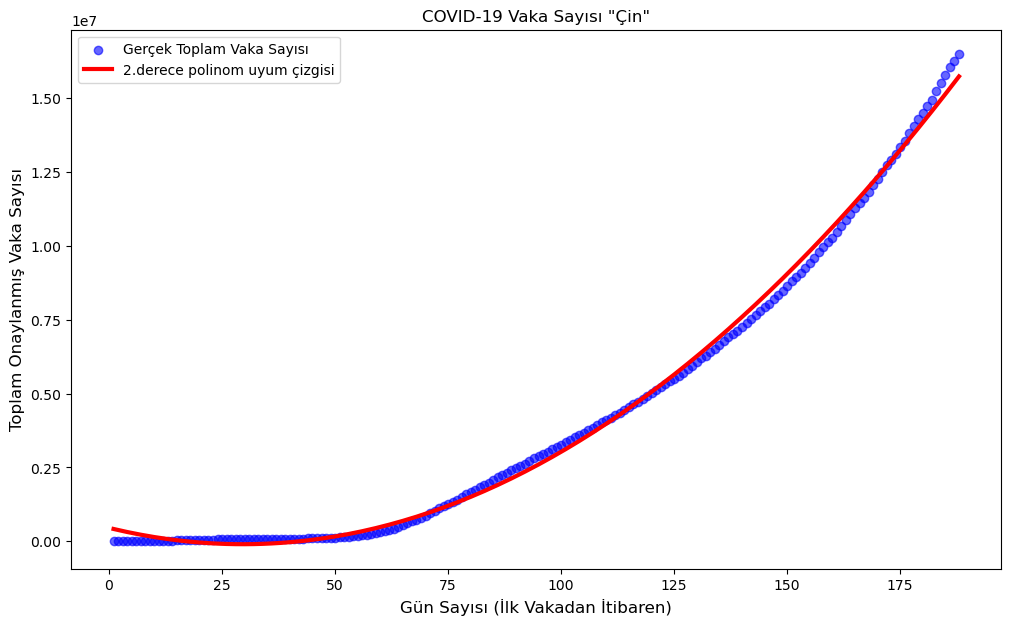

In [164]:
X_fit = np.linspace(X.min(), X.max(), len(df_global)).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = model.predict(X_fit_poly)

plt.figure(figsize=(12, 7))

# Gerçek veriy
plt.scatter(X['Day_Number'], y, color='blue', label='Gerçek Toplam Vaka Sayısı', alpha=0.6)

# Polinomal uyum çizgisi
plt.plot(X_fit, y_fit, color='red', linewidth=3, label ="2.derece polinom uyum çizgisi")
plt.title(f'COVID-19 Vaka Sayısı "Çin"')
plt.xlabel('Gün Sayısı (İlk Vakadan İtibaren)', fontsize=12)
plt.ylabel('Toplam Onaylanmış Vaka Sayısı', fontsize=12)
plt.legend()
plt.show()